# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

>● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

>● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

>● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


### Dataset Description 

> This is a dataset showing the ratings of movies from 1960 to 2015 on Imdb, it also shows some more information like, revenue, budjet and cast, etc


### Question(s) for Analysis
>1- Is there a change in revenues of movies over years and what are the years with minimum and maximum revenues?
>2- Is there a change in popularity of movies over years and what are the years with minimum and maximum movies popularity?
>3- What are the top 10 movies acheiving revenues from 1960 till 2015?
?4- What are the top 10 movies with highest budget from 1960 till 2015?

In [3]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
%pylab

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
### Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# exploring the shape of the dataset
df.shape

(10866, 21)

>The dataset comtains 10866 rows and 21 coloumns

In [6]:
# exploring data types of each coloumn
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# defining the number of duplicated rows
df.duplicated().sum()

1

>we have 1 duplicated rows in the dataset will be removed in the data cleaning section

In [8]:
# defining info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>no missing data

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Minimum runtime is 0 which is non logical, so I am going to remove these rows because it will affect my analysis

In [10]:
# Counting the number of occurence of each item in the budget column
df['budget'].value_counts()

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      165
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

>Since there are alot of non logical budgets, I am going to remove non logical budgets with the effective counts so I am going to remove rows with 0 budget.

In [11]:
# Counting the number of occurence of each item in the revenue column
df['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
13000000        5
20000000        5
14000000        5
30000000        5
7000000         4
4300000         4
4000000         4
1000000         4
50000000        4
25000000        4
60000000        3
6700000         3
11              3
16000000        3
15              3
29000000        3
21000000        3
100000000       3
102000000       3
3               3
16              3
2500000         3
70000000        3
             ... 
42721196        1
79958599        1
40084041        1
442965          1
50752337        1
30857814        1
1400000         1
7027290         1
303788635       1
10300000        1
45916769        1
26049082        1
211989043       1
41009669        1
346079773       1
4729352         1
23159305        1
272742922       1
525             1
2626800         1
39946780        1
3117985         1
22270           1
65884703        1
4500000   

>Since there are alot of non logical revenues, I am going to remove non logical revenues with the effective counts so I am going to remove rows with 0 revenue since they weights alot regarding the total sample.

In [12]:
# defining number of nulls in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>There are some information missing, and should be added by investigating the right information, the missing information can't be added via python, we have to search for the correct information and add it manually.

In [13]:
# removing the duplicate row
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(10865, 21)

>The duplicated row was removed succefully and number of rows decreased to be 10865

In [14]:
# removing rows which contain budget = 0
df=df.loc[df["budget"]!=0]
df.shape

(5169, 21)

 >rows which contains movies budget = 0 were removed succefully and number of rows became 5169

In [15]:
# removing rows which contain revenue = 0
df=df.loc[df["revenue"]!=0]
df.shape

(3854, 21)

>rows which contains movies revenue = 0 were removed succefully and number of rows became 3854

In [16]:
# removing rows which contain runtime = 0
df=df.loc[df["runtime"]!=0]
df.shape

(3854, 21)

>All rows which contain non logical data were removed succefully and number of rows became 3854

In [17]:
# checking if there is duplicated rows with the same imdb id
df["imdb_id"].duplicated().sum()

0

>There is no rows with duplicated Imdb ids

In [18]:
# checking if there is duplicated rows with the same id
df["id"].duplicated().sum()

0

>There is no rows with duplicated id

In [19]:
# checking if there is duplicated rows with the same originaltitle
df["original_title"].duplicated().sum()

46

>There is 46 rows with duplicated original tittle

In [20]:
#duplicated rows which have the same original tittle
df.drop_duplicates(['original_title'], keep ='first', inplace = True)
df.shape

(3808, 21)

>Cleaning data is completed now, we have 3808 final rows to be analysed

In [21]:
#Removing unnecessary columns
df.drop(['id','imdb_id','budget','revenue','cast','homepage','director','tagline','keywords','overview','production_companies','release_date','vote_count','vote_average'], axis=1, inplace=True)
df.head()

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [22]:
#converting popularity, runtime, budget_adj, and revenue_adj into integers
df[['popularity','runtime','budget_adj', 'revenue_adj']] = df[['popularity','runtime','budget_adj', 'revenue_adj']].applymap(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 7 columns):
popularity        3808 non-null int64
original_title    3808 non-null object
runtime           3808 non-null int64
genres            3808 non-null object
release_year      3808 non-null int64
budget_adj        3808 non-null int64
revenue_adj       3808 non-null int64
dtypes: int64(5), object(2)
memory usage: 238.0+ KB


>all needed data were changed successfully into integers

In [23]:
#Save a new csv file after cleaning data
df.to_csv('clean_tmdb_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### General look on the data

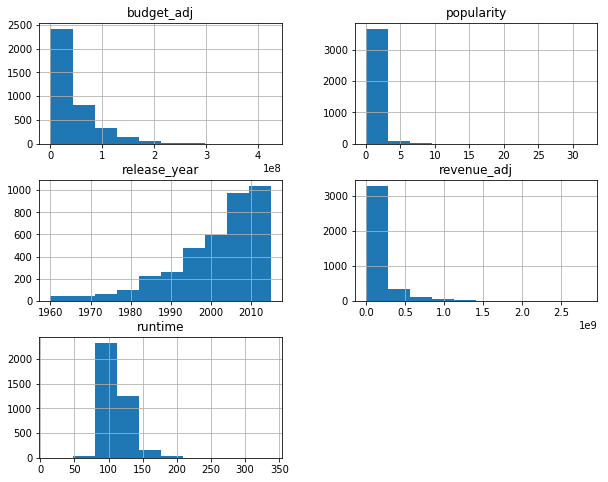

In [24]:
# Having an overall look on the data
df.hist(figsize=(10,8));

### Research Question 1  (Is there a change in revenues of movies over years and what are the years with minimum and maximum revenues?)

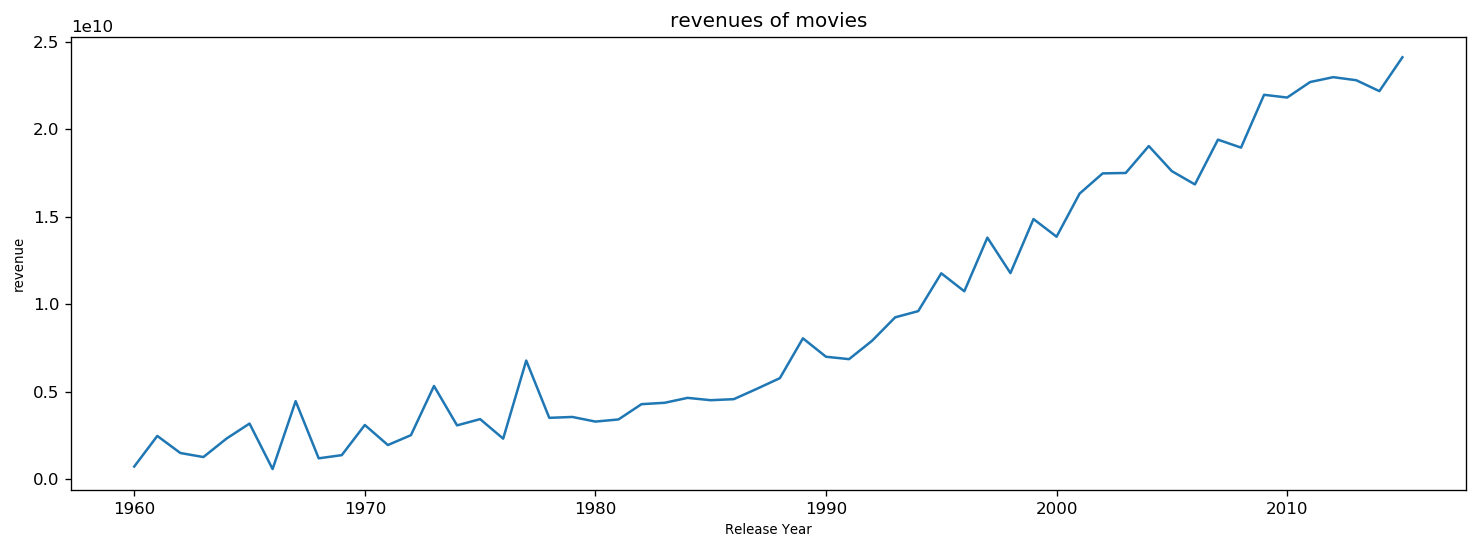

Maximum revenue was in 2015
Minimum revenue was in 1966


In [25]:
# showing a line graph to show change of movies revenues over time
def find_trend(column_x,column_y):
    #load clean data
    df = pd.read_csv('clean_tmdb_data.csv')
    #set graph size
    plt.figure(figsize=(15,5), dpi =120)
    #plotting the graph
    plt.plot(df.groupby(column_x)[column_y].sum())
    df.groupby(column_x)[column_y].sum().describe()
    max_value = df.groupby(column_x)[column_y].sum().idxmax()
    min_value = df.groupby(column_x)[column_y].sum().idxmin()
    return max_value,min_value,plt

maxval,minval,plt=find_trend('release_year','revenue_adj')
#x-axis label
plt.xlabel('Release Year', fontsize = 8)
#y-axis label
plt.ylabel('revenue', fontsize = 8)
#title of the graph
plt.title('revenues of movies')
plt.show()
print('Maximum revenue was in', maxval)
print('Minimum revenue was in',minval)

### Research Question 2  (Is there a change in popularity of movies over years and what are the years with minimum and maximum movies popularity?)

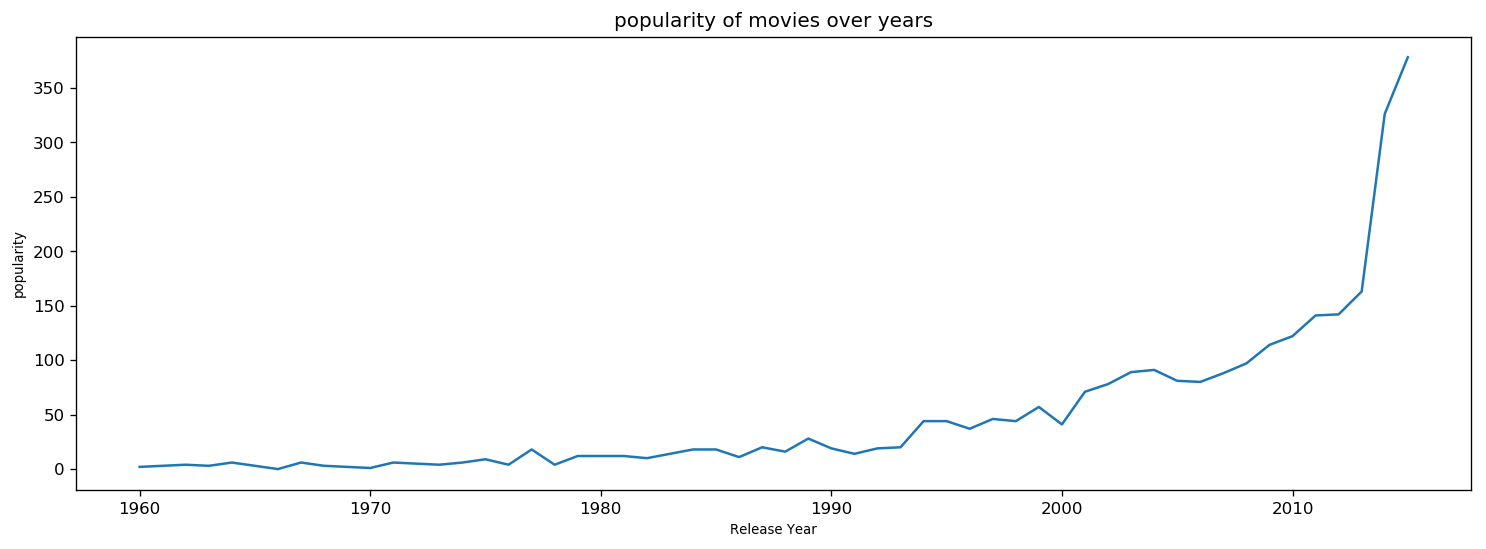

Maximum revenue was in 2015
Minimum revenue was in 1966


In [26]:
maxval,minval,plt=find_trend('release_year','popularity')
#x-axis label
plt.xlabel('Release Year', fontsize = 8)
#y-axis label
plt.ylabel('popularity', fontsize = 8)
#title of the graph
plt.title('popularity of movies over years')
plt.show()
print('Maximum revenue was in', maxval)
print('Minimum revenue was in',minval)

### Research Question 3  (What are the top 10 movies acheiving revenues from 1960 till 2015?)

In [27]:
df=df.sort_values(by = 'revenue_adj', ascending=False)
Top_10 =df.head(10)
Top_10

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
1386,9,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009,240886902,2827123750
1329,12,Star Wars,121,Adventure|Action|Science Fiction,1977,39575591,2789712242
5231,4,Titanic,194,Drama|Romance|Thriller,1997,271692064,2506405735
10594,2,The Exorcist,122,Drama|Horror|Thriller,1973,39289276,2167324901
9806,2,Jaws,124,Horror|Thriller|Adventure,1975,28362748,1907005841
3,11,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919,1902723129
8889,2,E.T. the Extra-Terrestrial,115,Science Fiction|Adventure|Family|Fantasy,1982,23726245,1791694309
8094,1,The Net,114,Crime|Drama|Mystery|Thriller|Action,1995,31481271,1583049536
10110,2,One Hundred and One Dalmatians,79,Adventure|Animation|Comedy|Family,1961,29179444,1574814739
4361,7,The Avengers,143,Science Fiction|Action|Adventure,2012,208943741,1443191435


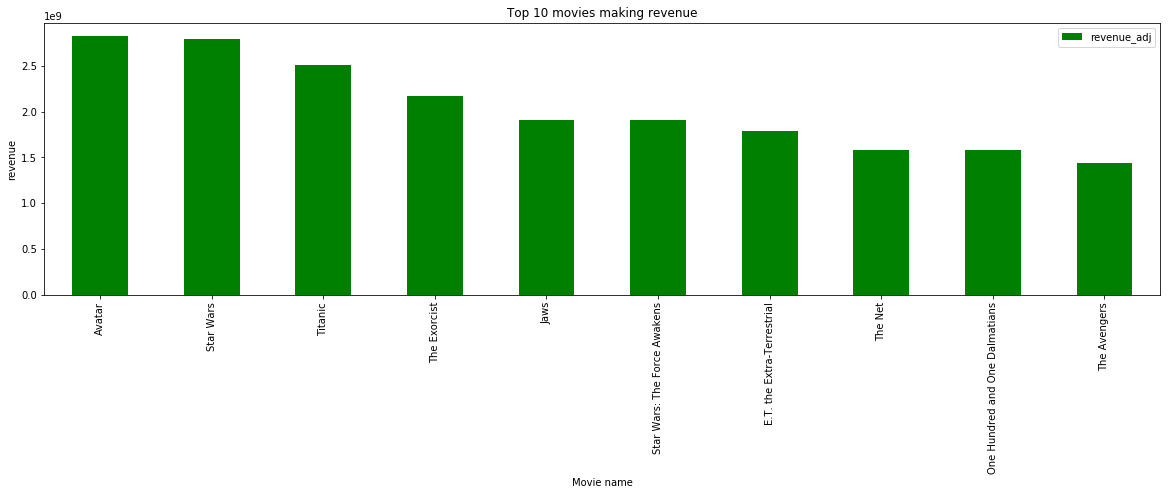

In [28]:
#Setting the size of the chart

plt.figure(figsize=[20,5])

#Sorting datafreame descendingly according to the revenue acheived
df=df.sort_values(by = 'revenue_adj',ascending=False)

#Showing only top 10 movies acheiving revenue
Top_10 =df.head(10)

#Group original title by revenue in order to be able to graph it
sort=Top_10.groupby('original_title').sum()['revenue_adj']

#Sort values according to the grouped data and plot it on a bar graph
sort=sort.sort_values(ascending=False)
sort=sort.plot(kind = 'bar', color = 'green')

#determining plot details
plt.legend();
plt.title('Top 10 movies making revenue')
plt.xlabel('Movie name')
plt.ylabel('revenue');

>Avatar is the movie with highest revenue from 1960 till 2015

### Research Question 4  (What are the top 10 movies with highest budget from 1960 till 2015?)

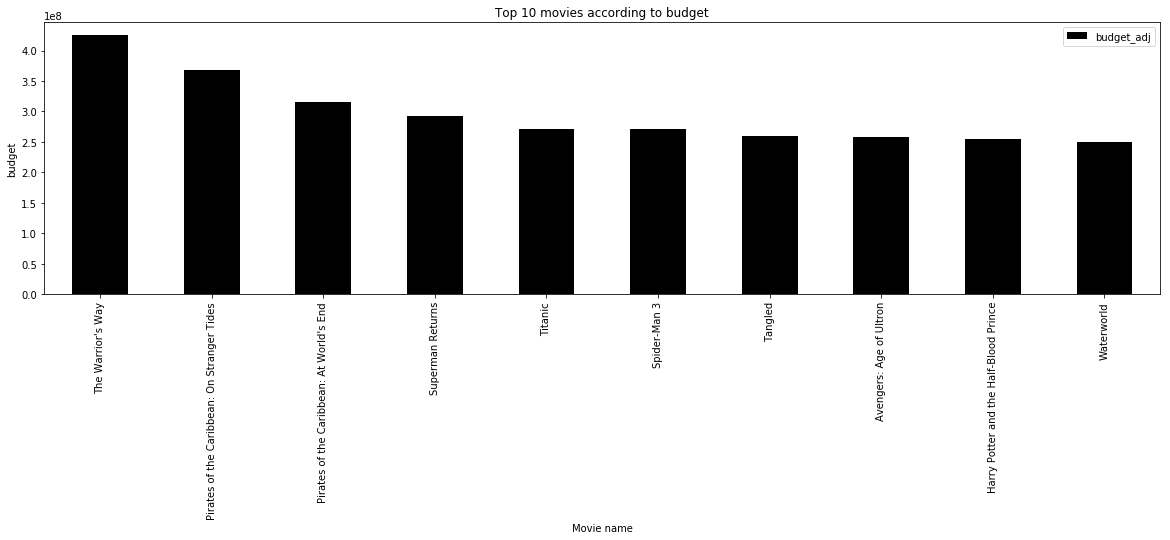

In [29]:
#Setting the size of the chart

plt.figure(figsize=[20,5])

#Sorting datafreame descendingly according to the budget acheived
df=df.sort_values(by = 'budget_adj',ascending=False)

#Showing only top 10 movies according to budget
Top_10 =df.head(10)

#Group original title by budget in order to be able to graph it
sort=Top_10.groupby('original_title').sum()['budget_adj']

#Sort values according to the grouped data and plot it on a bar graph
sort=sort.sort_values(ascending=False)
sort=sort.plot(kind = 'bar', color = 'black')

#determining plot details
plt.legend();
plt.title('Top 10 movies according to budget')
plt.xlabel('Movie name')
plt.ylabel('budget');

> The warrior's way is the movie with the highest budget 

<a id='conclusions'></a>
## Conclusions

> Movies revenues has witnessed a huge increase over years, 2015 is the years in which movies had acgeived the highest revenues and 1960 is the lowest

> Movies' popularity had witnessed a massive increase over years to reach it's peak in 2015, while it was the lowest in 1966

> Top 10 movies generating revenues from 1960 till 2015 are:

1-Avatar
2-Star wars
3-Titanic
4-The excorsist
5-Jaws
6-Star Wars: The Force Awakens
7-E.T. the Extra-Terrestrial
8-The Net
9-One Hundred and One Dalmatians	
10-The Avengers

>Top 10 movies according to budget from 1960 till 2015 are:

1-The Warrior's Way
2-Pirates of the Caribbean: On Stranger Tides
3-Pirates of the Caribbean: At World's End
4-Superman Returns
5-Titanic
6-Spider-Man 3
7-Tangled
8-Avengers: Age of Ultron
9-Harry Potter and the Half-Blood Prince	
10-Waterworld

>Only one movie was from the top 10 movies with highest budget and was as well from the top 10 generating revenues, this movie is Titanic, this means that paying high budget is not a causation of generating high revenues


<a id='limitations'></a>
## Limitations

>Budget and Revenues contain some illogical data, some budges are 120,300,400, etc, this is illogical

>There was alot of missing data

>There was some important data could have been added to the dataset as the number of awards won by each movie

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0